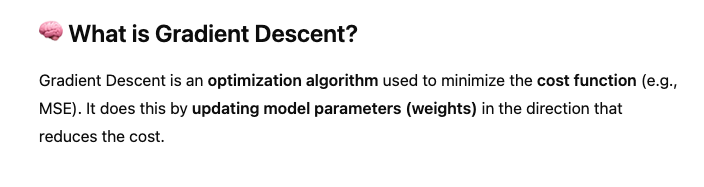

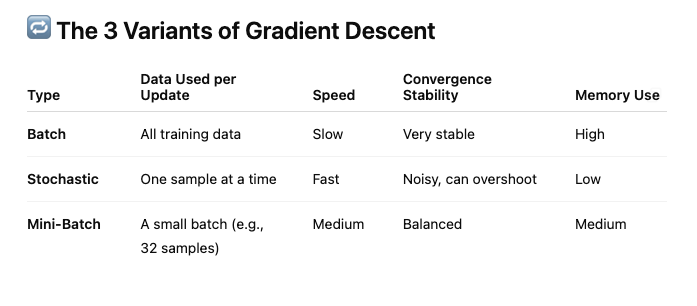

In [ ]:
"""
1. 🚛 Batch Gradient Descent
Computes gradient using entire dataset

Accurate gradients, but slow on large data

Very memory-intensive
"""

for epoch in range(epochs):
    y_pred = w * X + b
    error = y_pred - y
    grad_w = 2 * np.mean(error * X)
    grad_b = 2 * np.mean(error)
    
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

In [ ]:
"""
2. 🚀 Stochastic Gradient Descent (SGD)
Updates weights after each individual sample

Very fast, but can fluctuate (noisy path to the minimum)

Good for online learning and huge datasets
"""

for epoch in range(epochs):
    for i in range(len(X)):
        y_pred = w * X[i] + b
        error = y_pred - y[i]
        grad_w = 2 * error * X[i]
        grad_b = 2 * error
        
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

In [ ]:
"""
3. 📦 Mini-Batch Gradient Descent
Compromise between batch and SGD

Uses small batches (e.g., 32 or 64 samples)

Efficient, stable, and widely used in practice
"""

batch_size = 2
for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        
        y_pred = w * X_batch + b
        error = y_pred - y_batch
        grad_w = 2 * np.mean(error * X_batch)
        grad_b = 2 * np.mean(error)

        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

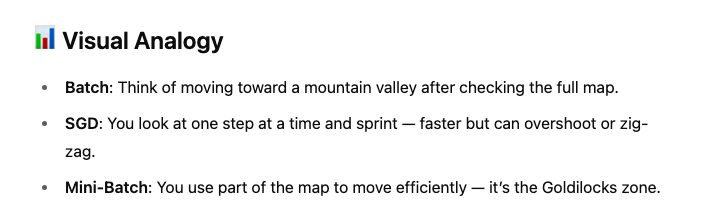

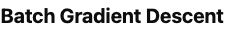

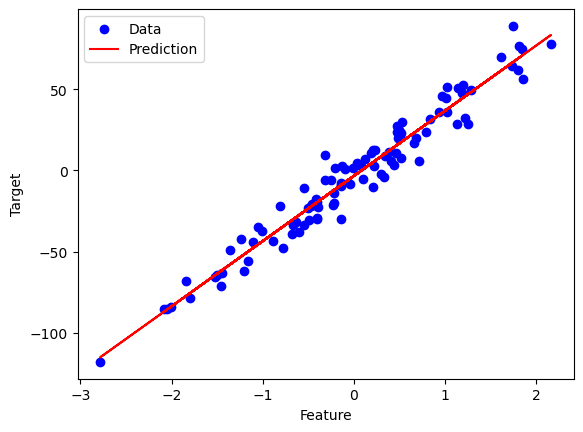

Final theta: [-3.44953003 40.15414565]


In [4]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Create a simple linear regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Normalize the data
X = (X - np.mean(X)) / np.std(X)

# Adding intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Learning rate and iterations
learning_rate = 0.1
iterations = 1000
m = len(X_b)

# Initializing theta
theta = np.random.randn(2)

# Batch Gradient Descent
for _ in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Compute the gradient
    theta -= learning_rate * gradients  # Update theta

# Plotting the result
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b.dot(theta), color='red', label='Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

print("Final theta:", theta)

The Batch Gradient Descent method computes the gradient for the entire dataset in each iteration and updates the parameters (theta) accordingly.

This process repeats for a number of iterations to converge to the optimal values for theta.

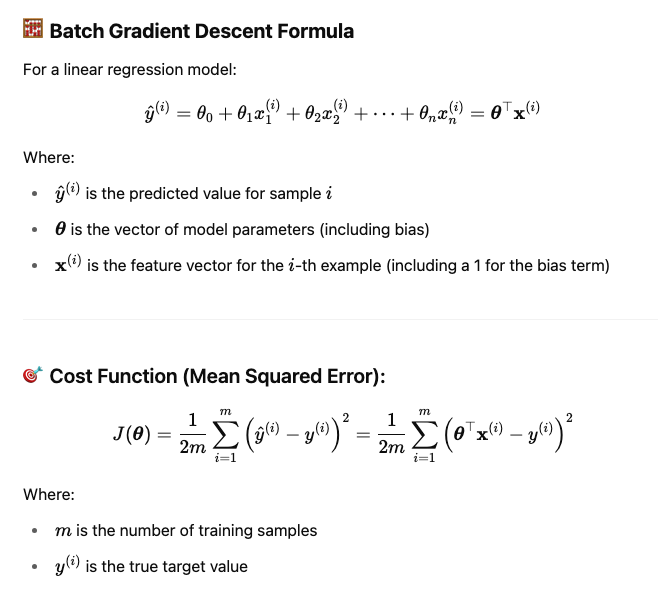

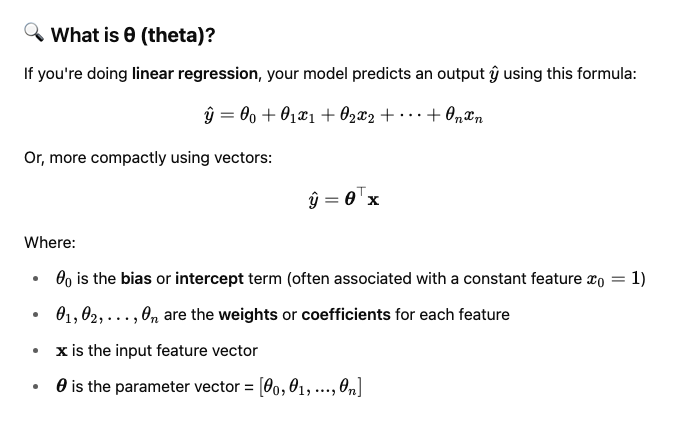

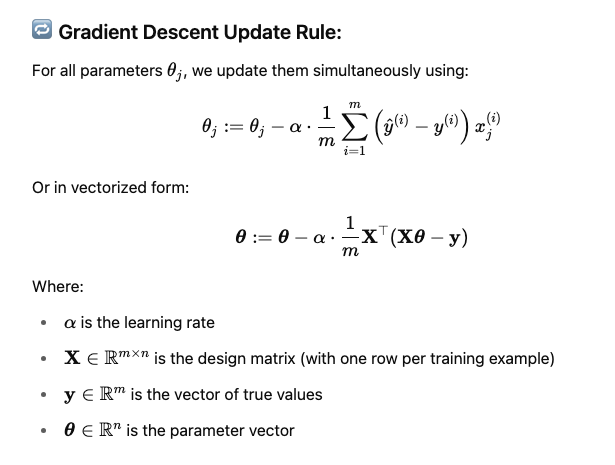

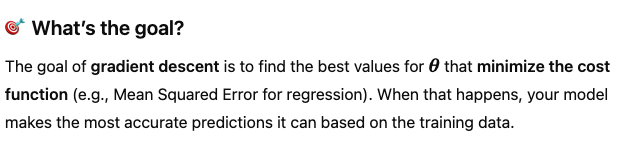

In [34]:
# Batch Gradient Descent

iterations = 20

for x in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Compute the gradient
    print(f"epoch: {x}, gradient: ",np.round(gradients,10),"\n")
    theta -= learning_rate * gradients  # Update theta
    print(f"epoch: {x}, theta: ",np.round(theta,10),"\n")

epoch: 0, gradient:  [ 0. -0.] 

epoch: 0, theta:  [-3.44953003 40.15414565] 

epoch: 1, gradient:  [ 0. -0.] 

epoch: 1, theta:  [-3.44953003 40.15414565] 

epoch: 2, gradient:  [ 0. -0.] 

epoch: 2, theta:  [-3.44953003 40.15414565] 

epoch: 3, gradient:  [ 0. -0.] 

epoch: 3, theta:  [-3.44953003 40.15414565] 

epoch: 4, gradient:  [ 0. -0.] 

epoch: 4, theta:  [-3.44953003 40.15414565] 

epoch: 5, gradient:  [ 0. -0.] 

epoch: 5, theta:  [-3.44953003 40.15414565] 

epoch: 6, gradient:  [ 0. -0.] 

epoch: 6, theta:  [-3.44953003 40.15414565] 

epoch: 7, gradient:  [ 0. -0.] 

epoch: 7, theta:  [-3.44953003 40.15414565] 

epoch: 8, gradient:  [ 0. -0.] 

epoch: 8, theta:  [-3.44953003 40.15414565] 

epoch: 9, gradient:  [ 0. -0.] 

epoch: 9, theta:  [-3.44953003 40.15414565] 

epoch: 10, gradient:  [ 0. -0.] 

epoch: 10, theta:  [-3.44953003 40.15414565] 

epoch: 11, gradient:  [ 0. -0.] 

epoch: 11, theta:  [-3.44953003 40.15414565] 

epoch: 12, gradient:  [ 0. -0.] 

epoch: 12, the

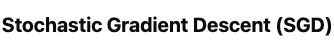

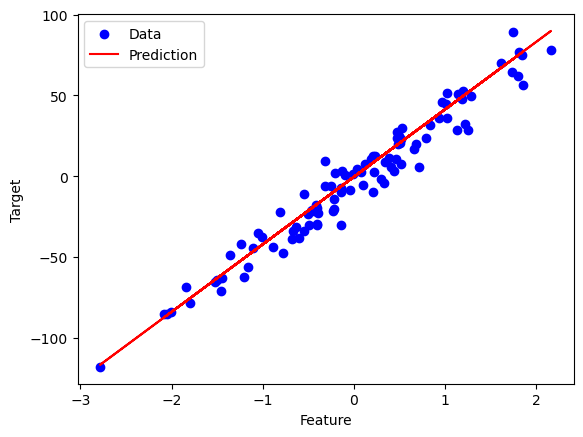

Final coefficients (theta): [41.74184289]


In [37]:
from sklearn.linear_model import SGDRegressor

# Create the same regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Normalize the data
X = (X - np.mean(X)) / np.std(X)

# Initialize and fit the model using Stochastic Gradient Descent
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.1, penalty=None)
sgd_regressor.fit(X, y)

# Plotting the result
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, sgd_regressor.predict(X), color='red', label='Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

print("Final coefficients (theta):", sgd_regressor.coef_)